<a href="https://colab.research.google.com/github/rana-salah/Computational-Genomics-Class/blob/main/Trinucleotides_Frequency_Calculation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
!pip install scipy numpy pandas matplotlib seaborn biopython

In [76]:
import requests
from io import StringIO
from Bio import SeqIO
from Bio.SeqUtils import GC
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from collections import Counter
import random
import seaborn as sns
from itertools import product

In [77]:
def compute_dinucleotide_frequencies(url):
    response = requests.get(url)
    fasta_content = StringIO(response.text)
    for record in SeqIO.parse(fasta_content, 'fasta'):
        genome = record.seq
    nucleotides = ['A', 'C', 'T', 'G']
    all_nucleotides = 0
    counts = {}
    frequency = {}
    for record in list(product(nucleotides, repeat=3)):
        trinucleotide = ''.join(map(str, record))
        counts[trinucleotide] = 0
    for i in range(len(genome)-2):
        trinucleotide = genome[i:i+3]
        counts[trinucleotide] += 1
        all_nucleotides += 1
    for trinucleotide in counts.keys():
        frequency[trinucleotide] = round(counts[trinucleotide]/all_nucleotides,3)
    return frequency

In [78]:
def sanity_check(genome):
    Freq = compute_dinucleotide_frequencies(genome)
    return sum(Freq.values())

In [79]:
def graphical_representation(genome):
    cat= compute_dinucleotide_frequencies(genome)
    dogs= list(cat.keys())
    mice= list(cat.values())
    fig = plt.figure(figsize=(30,5))
    plt.bar(dogs, mice, color='purple', width= 0.8)
    plt.title('Trinucleotides Frequency')
    plt.xlabel('Trinucleotides')
    plt.ylabel('Frequency')
    plt.show

In [80]:
genome1 = "https://raw.githubusercontent.com/ahmedmoustafa/datasets/main/genomes/NC_000913.fa"
genome2 = "https://raw.githubusercontent.com/ahmedmoustafa/datasets/main/genomes/NC_000962.fa"

In [81]:
compute_dinucleotide_frequencies(genome1)


{'AAA': 0.023,
 'AAC': 0.018,
 'AAT': 0.018,
 'AAG': 0.014,
 'ACA': 0.013,
 'ACC': 0.016,
 'ACT': 0.011,
 'ACG': 0.016,
 'ATA': 0.014,
 'ATC': 0.019,
 'ATT': 0.018,
 'ATG': 0.016,
 'AGA': 0.012,
 'AGC': 0.017,
 'AGT': 0.011,
 'AGG': 0.011,
 'CAA': 0.017,
 'CAC': 0.014,
 'CAT': 0.017,
 'CAG': 0.023,
 'CCA': 0.019,
 'CCC': 0.01,
 'CCT': 0.011,
 'CCG': 0.019,
 'CTA': 0.006,
 'CTC': 0.009,
 'CTT': 0.014,
 'CTG': 0.022,
 'CGA': 0.015,
 'CGC': 0.025,
 'CGT': 0.016,
 'CGG': 0.019,
 'TAA': 0.015,
 'TAC': 0.011,
 'TAT': 0.014,
 'TAG': 0.006,
 'TCA': 0.018,
 'TCC': 0.012,
 'TCT': 0.012,
 'TCG': 0.015,
 'TTA': 0.015,
 'TTC': 0.018,
 'TTT': 0.024,
 'TTG': 0.017,
 'TGA': 0.018,
 'TGC': 0.021,
 'TGT': 0.013,
 'TGG': 0.018,
 'GAA': 0.018,
 'GAC': 0.012,
 'GAT': 0.019,
 'GAG': 0.009,
 'GCA': 0.021,
 'GCC': 0.02,
 'GCT': 0.017,
 'GCG': 0.025,
 'GTA': 0.011,
 'GTC': 0.012,
 'GTT': 0.018,
 'GTG': 0.014,
 'GGA': 0.012,
 'GGC': 0.02,
 'GGT': 0.016,
 'GGG': 0.01}

In [82]:
sanity_check(genome1)

1.0040000000000007

In [83]:
compute_dinucleotide_frequencies(genome2)

{'AAA': 0.005,
 'AAC': 0.012,
 'AAT': 0.006,
 'AAG': 0.008,
 'ACA': 0.01,
 'ACC': 0.023,
 'ACT': 0.007,
 'ACG': 0.019,
 'ATA': 0.004,
 'ATC': 0.016,
 'ATT': 0.006,
 'ATG': 0.012,
 'AGA': 0.007,
 'AGC': 0.019,
 'AGT': 0.007,
 'AGG': 0.012,
 'CAA': 0.012,
 'CAC': 0.02,
 'CAT': 0.011,
 'CAG': 0.019,
 'CCA': 0.021,
 'CCC': 0.02,
 'CCT': 0.012,
 'CCG': 0.042,
 'CTA': 0.005,
 'CTC': 0.013,
 'CTT': 0.008,
 'CTG': 0.019,
 'CGA': 0.028,
 'CGC': 0.039,
 'CGT': 0.019,
 'CGG': 0.041,
 'TAA': 0.002,
 'TAC': 0.006,
 'TAT': 0.004,
 'TAG': 0.005,
 'TCA': 0.012,
 'TCC': 0.014,
 'TCT': 0.007,
 'TCG': 0.028,
 'TTA': 0.002,
 'TTC': 0.011,
 'TTT': 0.005,
 'TTG': 0.013,
 'TGA': 0.012,
 'TGC': 0.02,
 'TGT': 0.01,
 'TGG': 0.02,
 'GAA': 0.012,
 'GAC': 0.02,
 'GAT': 0.016,
 'GAG': 0.013,
 'GCA': 0.02,
 'GCC': 0.038,
 'GCT': 0.018,
 'GCG': 0.039,
 'GTA': 0.007,
 'GTC': 0.021,
 'GTT': 0.012,
 'GTG': 0.02,
 'GGA': 0.014,
 'GGC': 0.037,
 'GGT': 0.023,
 'GGG': 0.019}

In [84]:
sanity_check(genome2)

1.0020000000000004

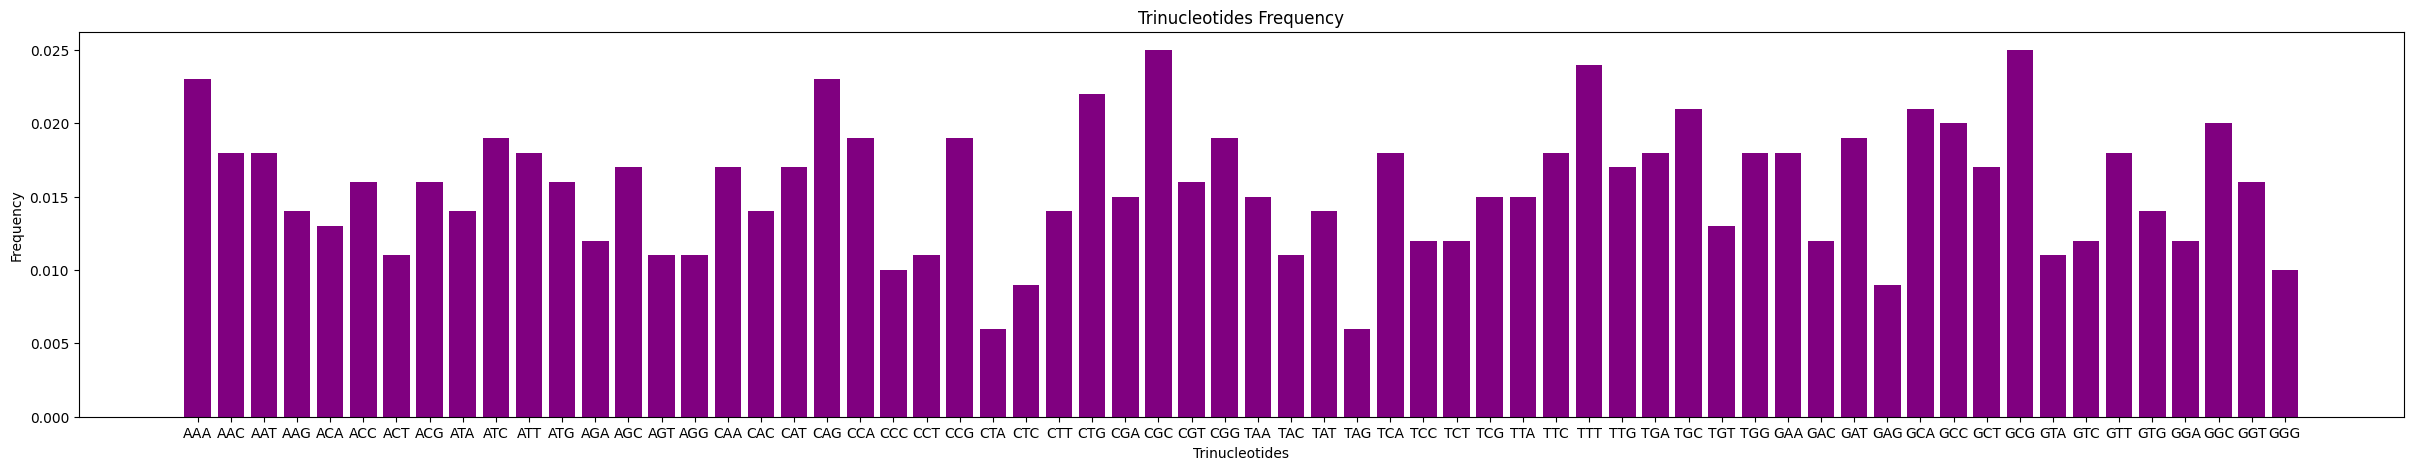

In [85]:
graphical_representation(genome1)

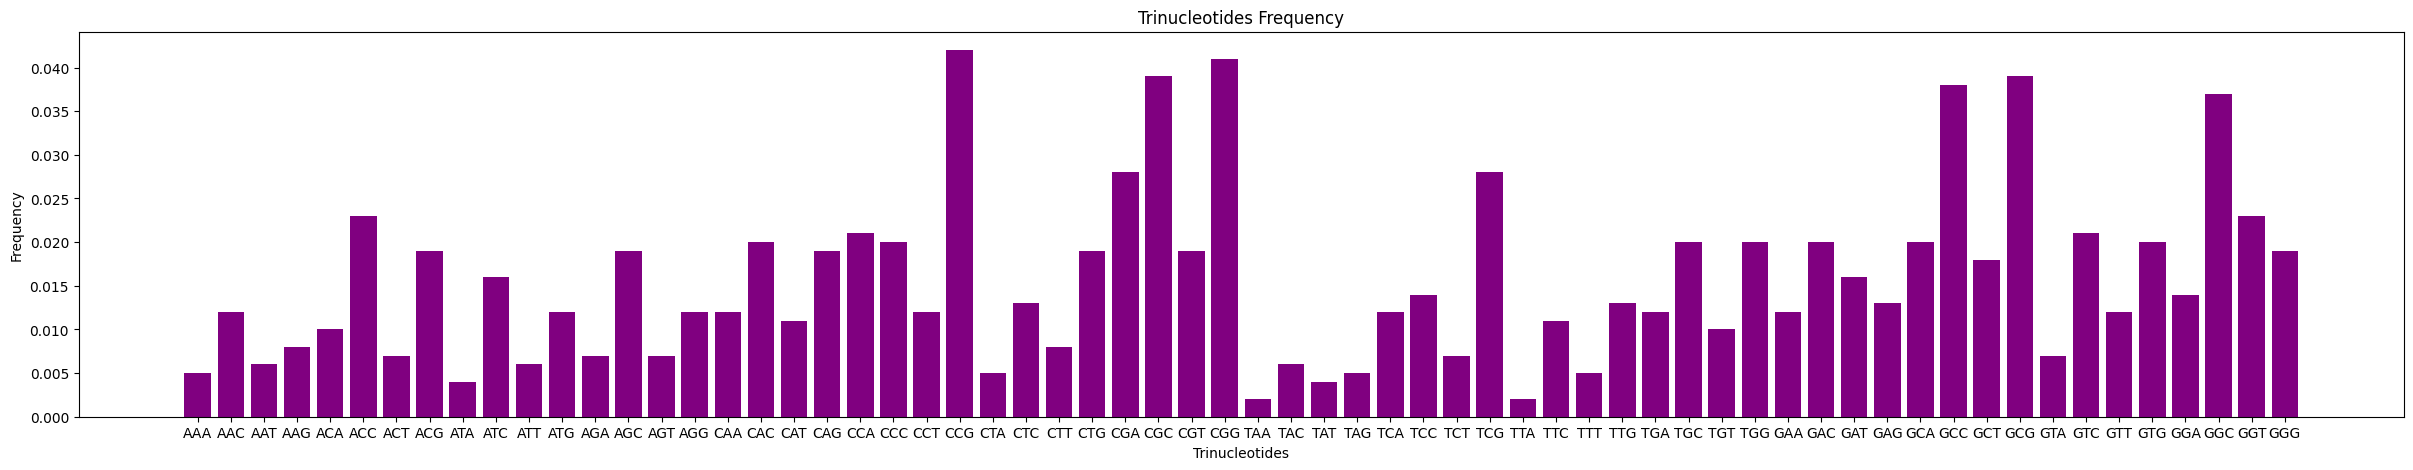

In [86]:
graphical_representation(genome2)